# Описание проекта

Нам нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


Итак, мы должны построить 2 модели для прогнозирования коэффициентов восстановления золота из золотосодеращей руды.

Целевыми признаками для нас будут эффективность обогащения чернового концентрата - **rougher.output.recovery**;

и эффективность обогащения финального кнцентрата - **final.output.recovery**

**Содержание проекта**

- [1. Подготовка данных](#1.-Подготовка-данных)
 - [1.1 Знакомство с данными](#1.1-Знакомство-с-данными)
 - [1.2 Проверка эффективности обогащения](#1.2-Проверка-эффективности-обогащения)
 - [1.3 Анализ признаков тестовой выборки](#1.3-Анализ-признаков-тестовой-выборки)
 - [1.4 Предобработка данных](#1.4-Предобработка-данных)
- [2. Анализ данных](#2.-Анализ-данных)
 - [2.1 Изменение концентрации металлов на этапах очистки](#2.1-Изменение-концентрации-металлов-на-этапах-очистки)
 - [2.2 Сравнение распределений размеров гранул сырья](#2.2-Сравнение-распределений-размеров-гранул-сырья)
 - [2.3 Исследование суммарной концентрации всех веществ на разных этапах](#2.3-Исследование-суммарной-концентрации-всех-веществ-на-разных-этапах)
- [3. Модель](#3.-Модель)
 - [3.1 Функция для вычисления итоговой sMAPE](#3.1-Функция-для-вычисления-итоговой-sMAPE)
 - [3.2 Обучение моделей](#3.2-Обучение-моделей)
   - [3.2.1 Линейная регрессия](#3.2.1-Линейная-регрессия)
   - [3.2.2 Дерево решений в регрессии](#3.2.2-Дерево-решений-в-регрессии)
   - [3.2.3 Случайный лес в регрессии](#3.2.3-Случайный-лес-в-регрессии)
- [Вывод](#Вывод)

**Технологический процесс получения золота**

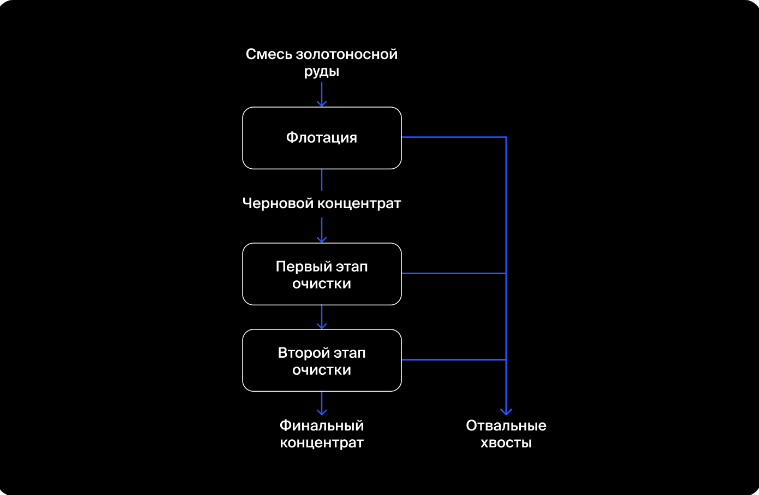

Опишем каждую стадию:

1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

# 1. Подготовка данных

##  1.1 Знакомство с данными

Итак, сначала загрузим необходимые библиотеки и инструменты.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

Познакомимся с обучающей выборкой.

In [2]:
train_sample = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
train_sample.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


Здесь мы видим, что обучающая выборка обладает 87 признаками - 1 - это дата по часам, 86 - производственные характеристики.

Их так много, потому что технология производства золота делится на 4 этапа:

 - rougher - флотация;
 - primary_cleaner — первичная очистка
 - secondary_cleaner — вторичная очистка
 - final — характеристики конечного продукта.

Каждый этап производства золота, в свою очередь, обладает своими типами параметров, их тоже четыре:

 - input — параметры сырья;
 - output — параметры продукта;
 - state — параметры, характеризующие текущее состояние этапа;
 - calculation — расчётные характеристики.
 
Каждый тип параметров включает в себя уже конкретные параметры, которые выражают определенные производственные характеристики, их много, поэтому весь список приводить не будем.

Пример: **rougher.input.feed_au** - доля золота в руде до осуществления флотации, а **rougher.output.concentrate_au**  - доля золота в концентрате после флотации.

Также обращает на себя внимание огромное количество пропусков в данных, и во многих столбцах количество пропущенных значений различается. Кроме того, самое большое количество пропусков в выходных значениях содержания золота в хвостах после флотации (rougher.output.tail_au) и в  эффективности обогащения чернового концентрата - rougher.output.recovery. 

Далее взглянем на тестовую выборку.

In [4]:
test_sample = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
test_sample.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

Здесь мы видим меньшее количество признаков и вроде бы более стройную ситуацию с пропусками.

Далее посмотрим на исходные данные.

In [6]:
full_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
full_data[full_data['date'] == '2016-09-02 09:59:59']

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5554,2016-09-02 09:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,12.002664,-499.113047,8.061677,-495.442389,8.079009,-495.166033,5.171338,-479.361256,10.056638,-498.99198


In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Признаков также 87. Проверим, что названия столбцов в обучающей выборке соответствуют исходным данным.

In [9]:
full_data.columns == train_sample.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Итак, мы здесь видим полное соответствие названий.

Далее, следует посмотреть, не помогут ли нам исходные данные заполнить пропуски в обучающей выборке.

Количество значений rougher.input.feed_au в обучающей выборке (16777) и в тестовой (5840) равно количеству значений в исходных данных (22617). То есть, по всей видимости, заполнить пропуски значениями из исходных данных в обучающей выборке у нас не получится.

С данными, в целом познакомились. Предобработку сделаем в разделе 1.4.

## 1.2 Проверка эффективности обогащения

Итак, нам необходимо проверить, верно ли рассчитана эффективность обогащения чернового концентрата -rougher.output.recovery.

Для этого мы возьмем обучающую выборку, самостоятельно рассчитаем этот коэффициент по формуле и найдем среднее абсолютное отклонение (МАЕ) между расчетами и фактическими значениями.

Создадим датафрейм для проверки только с необходимыми признаками.

In [10]:
recovery_check_data = train_sample[['date', 'rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au', 'rougher.output.recovery' ]]
recovery_check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           16860 non-null  object 
 1   rougher.output.concentrate_au  16778 non-null  float64
 2   rougher.input.feed_au          16777 non-null  float64
 3   rougher.output.tail_au         14611 non-null  float64
 4   rougher.output.recovery        14287 non-null  float64
dtypes: float64(4), object(1)
memory usage: 658.7+ KB


Мы видим, что эффективность рассчитана далеко не для всех наблюдений. И точно восстновить ее не получится, поскольку пропущены данные о концентрации золота в хвостах. В данном случае просто избавимся от пропусков, чтобы оценить, верно ли вообще эффективность рассчитана.

In [11]:
recovery_check_data = recovery_check_data.dropna()
recovery_check_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           14287 non-null  object 
 1   rougher.output.concentrate_au  14287 non-null  float64
 2   rougher.input.feed_au          14287 non-null  float64
 3   rougher.output.tail_au         14287 non-null  float64
 4   rougher.output.recovery        14287 non-null  float64
dtypes: float64(4), object(1)
memory usage: 669.7+ KB


Итак, у нас получилось почти 14.5 тысяч наблюдений.

Создадим функцию для расчета эффективности.

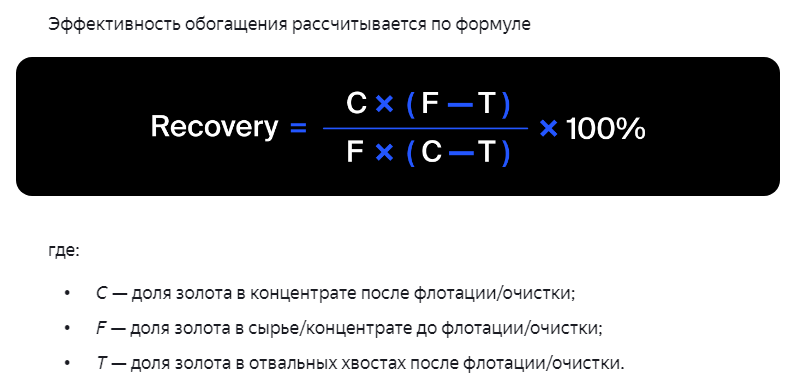

In [12]:
def check_rougher_output_recovery(row):
    
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    
    if F * (C - T) == 0:
        return
    else: 
        recovery = (C * (F - T)) / (F * (C - T)) * 100
        
        return recovery

In [13]:
recovery_check_data['check_rougher_recovery'] = recovery_check_data.apply(check_rougher_output_recovery, axis = 1)
mean_absolute_error(recovery_check_data['rougher.output.recovery'],recovery_check_data['check_rougher_recovery'] )

9.303415616264301e-15

Итак, МАЕ находится на очень низком уровне, что говорит о том, что фактические данные об эффективности обогащения чернового концентрата в обучающей выборке рассчитаны верно. Значит, мы можем доверять фактическом коэффициенту.

## 1.3 Анализ признаков тестовой выборки

Далее проведем анализ признаков тестовой выборки - а конкретно, какие из признаков, которые есть в исходных данных, отсутствуют в тестовой выборке. Для ответа на этот вопрос сравним множества признаков двух датасетов.

In [14]:
set(train_sample.columns) ^ set(test_sample.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Здесь мы видим, что в тестовой выборке отсутствуют признаки со следующими типами параметров:

 - calculation - то есть расчетные характеристики;
 - output - параметры выходного продукта на каждой стадии.
 
 
Другими словами, тестовая выборка содержит только типы параметров:
 - input - параметры сырья;
 - state - параметры, характеризующие текущее состояние этапа.

## 1.4 Предобработка данных

На этом этапе приступим к предобработке данных.

Начнем с индексации. При описани данных нам дали подсказку о том, что данные индексируются датой и временем получения информации. Возможно, мы можем сделать столбец 'date' индексом. Убедимся, что в каждом датасете значения в этом столбце уникальны.

In [15]:
dfs = [train_sample, test_sample, full_data]
for df in dfs:
    display(df['date'].value_counts())

2018-05-31 18:59:59    1
2017-03-18 13:59:59    1
2017-07-24 23:59:59    1
2018-08-05 22:59:59    1
2018-06-24 16:59:59    1
                      ..
2018-07-09 18:59:59    1
2017-06-30 18:59:59    1
2017-08-31 03:59:59    1
2017-01-23 18:59:59    1
2016-08-28 03:59:59    1
Name: date, Length: 16860, dtype: int64

2016-11-17 12:59:59    1
2017-09-24 08:59:59    1
2017-10-10 06:59:59    1
2017-12-24 08:59:59    1
2016-12-22 07:59:59    1
                      ..
2016-11-07 18:59:59    1
2016-11-30 23:59:59    1
2016-10-10 00:59:59    1
2016-09-13 17:59:59    1
2016-11-23 22:59:59    1
Name: date, Length: 5856, dtype: int64

2017-09-11 15:59:59    1
2017-01-09 19:59:59    1
2018-05-06 02:59:59    1
2017-02-17 23:59:59    1
2017-12-15 15:59:59    1
                      ..
2016-12-30 13:59:59    1
2016-11-28 13:59:59    1
2016-09-18 14:59:59    1
2016-11-22 23:59:59    1
2017-11-20 15:59:59    1
Name: date, Length: 22716, dtype: int64

Получается, что все значения даты уникальны и мы можем сделать этот столбец индексом.

In [16]:
train_sample = train_sample.set_index('date')
test_sample = test_sample.set_index('date')
full_data = full_data.set_index('date')

Проверим, не содержат ли наши данные дубликатов.

In [17]:
for df in dfs:
    display(df[df.duplicated()])

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


На данном этапе дубликатов не выявлено.

Теперь самая главная проблема - огромное количество пропусков, которые вдобавок ко всему и не симметричны между собой.

Заполнить медианой все строки выглядит достаточно рискованным, что может привести к излишнему шуму.

Вообще, принимая во внимание тот факт, что у нас есть два целевых признака  - rougher.output.recovery и final.output.recovery, выглядит опасным заполнять какими-либо данными признаки, которые непосредственно влияют на целевые признаки, так как, на наш взгляд, это будет похоже на то, что мы немного "сочиним" ответы, что приведет к ненужному шуму.

Поэтому наблюдения с пропусками в признаках, которые непосредственно влияют на rougher.output.recovery (группа признаков rougher.output) и на final.output.recovery (группа признаков final.output), предлагается удалить.

Найдем названия этих столбцов и сохраним в массив.

In [18]:
output_arrays = (list(full_data.filter(regex=("final.output.")).columns) +
                list(full_data.filter(regex=("rougher.output.")).columns))
output_arrays

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au']

Итак, у нас есть массив с названия столбцов, которые выражают характеристики выхода продукции - на этапе флотации и после вторичной очистки.

Значит, из наших датасетов будем удалять строки с пропусками в этих столбцах.

ЧТо касается остальных признаков, то в описании данных также содержится подсказка о том, что соседние по времени данные часто похожи. Попробуем опереться на нее и заполнить такие пропуски последним наблюдаемым значением. Для этого выберем метод ffill в функции fillna().

Сделаем это для train_sample и full_data.

In [19]:
train_sample = train_sample.dropna(subset=output_arrays).fillna(method='ffill')
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13809 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13809 non-null  float64
 1   final.output.concentrate_pb                         13809 non-null  float64
 2   final.output.concentrate_sol                        13809 non-null  float64
 3   final.output.concentrate_au                         13809 non-null  float64
 4   final.output.recovery                               13809 non-null  float64
 5   final.output.tail_ag                                13809 non-null  float64
 6   final.output.tail_pb                                13809 non-null  float64
 7   final.output.tail_sol                               13809 non-null  float64
 8   final.output.tail_au                             

В обучающей выборке после этих манипуляций осталось около 82% наблюдений, что можно назвать удовлетворительным результатом.

In [20]:
full_data = full_data.dropna(subset=output_arrays).fillna(method='ffill')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19096 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19096 non-null  float64
 1   final.output.concentrate_pb                         19096 non-null  float64
 2   final.output.concentrate_sol                        19096 non-null  float64
 3   final.output.concentrate_au                         19096 non-null  float64
 4   final.output.recovery                               19096 non-null  float64
 5   final.output.tail_ag                                19096 non-null  float64
 6   final.output.tail_pb                                19096 non-null  float64
 7   final.output.tail_sol                               19096 non-null  float64
 8   final.output.tail_au                             

В исходных данных сохранилось около 84% наблюдений.

Для тестовой выборки просто заполним пропуски методом ffill, поскольку она не имеет характеристик выхода продукта.

In [21]:
test_sample = test_sample.fillna(method='ffill')
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 non-null

В конце взглянем на итоговую описательную статистику.

In [22]:
full_data[['rougher.input.feed_au','rougher.input.feed_size','rougher.output.concentrate_au',
             'rougher.output.tail_au', 'rougher.output.recovery',
              'primary_cleaner.output.concentrate_au','primary_cleaner.output.tail_au', 
              'secondary_cleaner.output.tail_au', 'final.output.concentrate_au',
         'final.output.tail_au', 'final.output.recovery']].describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,19096.0,8.324447,1.898116,0.010000,6.895394,8.169959,9.796633,13.731330
rougher.input.feed_size,19096.0,59.096001,22.209341,0.046369,47.462868,54.589417,64.996569,484.967466
rougher.output.concentrate_au,19096.0,19.809794,3.755456,0.000000,18.856818,20.312059,21.746581,28.824507
rougher.output.tail_au,19096.0,1.821040,0.673582,0.020676,1.408975,1.809408,2.214836,9.688980
rougher.output.recovery,19096.0,83.466547,14.129491,0.000000,81.248096,86.286278,90.053167,100.000000
primary_cleaner.output.concentrate_au,19096.0,32.141469,5.445024,0.000000,30.469425,32.820375,34.994601,45.933934
primary_cleaner.output.tail_au,19096.0,3.914087,1.570837,0.000000,2.934073,3.625169,4.583493,17.788925
secondary_cleaner.output.tail_au,19096.0,4.332002,2.318226,0.000000,3.172106,4.069931,5.065074,26.811643
final.output.concentrate_au,19096.0,44.095730,5.068959,0.000000,43.420936,45.016457,46.274891,51.571885
final.output.tail_au,19096.0,3.053189,0.910178,0.000000,2.468915,2.990713,3.576404,8.245022


В таблице настораживают 2 момента - в столбцах rougher.output.recovery и final.output.recovery есть значения с 0 и 100 - то есть когда металл был восстановлен из сырья полностью и вообще не восстановлен.

Нулевая эффективность может быть, когда концентрат равен нулю, а 100% - когда нулю равны соответствующие хвосты.

Проверим, выполняются ли эти условия для обозначенных случаев.

In [23]:
full_data[full_data['rougher.output.recovery'] == 0][['rougher.output.concentrate_au']].sum()

rougher.output.concentrate_au    0.0
dtype: float64

Сумма значений столбца равна нулю, значит, в черновом концентрате золота не было, и мы оставим эти строки.

Проверим 100% эффективность.

In [24]:
full_data[full_data['rougher.output.recovery'] == 100][['rougher.input.feed_au',
                                                        'rougher.output.concentrate_au', 
                                                        'rougher.output.tail_au']]

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au
date,,,
2018-03-12 02:59:59,0.01,0.01,1.352458
2018-03-12 03:59:59,0.01,0.01,1.352458
2018-03-12 04:59:59,0.01,0.01,1.352458
2018-03-12 05:59:59,0.01,0.01,1.352458
2018-03-12 06:59:59,0.01,0.01,1.352458


Такой ситуации не может быть, ведь если есть металл в "хвосте", значит, он отделился от сырья, и в черновом концентрате его доля должна была вырасти. Нужно удалить эти строки.

In [25]:
full_data = full_data[full_data['rougher.output.recovery'] < 100]
train_sample = train_sample[train_sample['rougher.output.recovery'] < 100]

Проверим нулевую концентрацию для эффективности финального концентрата.

In [26]:
full_data[full_data['final.output.recovery'] == 0][['final.output.concentrate_au']].sum()

final.output.concentrate_au    0.0
dtype: float64

Сумма столбца с конечными значениями концентрата равна нулю, значит, все в порядке, не трогаем строки.

Посмотрим на максимальную эффективность.

In [27]:
full_data[full_data['final.output.recovery'] == 100][['final.output.tail_au']].sum()

final.output.tail_au    0.0
dtype: float64

Мы видим, что сумма хвоствых значений равна нулю. Такая ситуация теоретически возможна. Строки оставим.

Поскольку мы удалили строки из исходных данных, удостоверимся в том, что тестовая выборка соответствует индексам исходных данных.

In [28]:
test_sample = test_sample.loc[test_sample.index & full_data.index]


**Выводы**

Итак, мы познакомились с данными, выяснили, что у нас 86 признаков, характеризующих процесс производства золота. 

В тестовой выборке отсутствуют признаки, относящиеся к типу параметров состояния и параметров выходного продукта.

Мы проверили расчет эффективности обогащения руды флотацией - выяснили, что данным можно доверять.

Проиндексировали таблицы столбцом с датой, удалили наблюдения из обучающей выборки и исходных данных там, где есть пропуски в столбцах, непосредственно влияющих на наши целевые признаки, заполнили оставшиеся пропуски последним наблюдаемым значением.

# 2. Анализ данных

На этом этапе будем анализировать полный датасет - full_data.

## 2.1 Изменение концентрации металлов на этапах очистки

Для анализа изменения концентрации металлов на разных этапах создадим функцию.

In [29]:
def concentration(metal):
    
    """Функция на вход принимает строковое название металла, затем отбирает признаки, в которых 
    оно содержится. После этого по заранее заданным индексам строятся массивы признаков для отбора 
    значений из исходных данных. Затем строятся боксплоты и выводится описательная статистика"""
    
    all_features = list(full_data.filter(regex=(metal + '$')).columns)
    
    idx = [4,5,2,0]
    
    feed_and_concentrate_features = [all_features[i] for i in idx]
    
    idx_2 = [6,3,7,1]
    
    tail_features = [all_features[i] for i in idx_2]
    
    sns.set_style('whitegrid')
    ax = plt.subplots(figsize = (10,6))
    data_concentrate = full_data[feed_and_concentrate_features]
    chart = sns.boxplot(data=data_concentrate, orient='h', palette='Set2', fliersize=0.5)
    plt.title(metal)
    plt.xlabel('Stage concentration, %')
    
    ax = plt.subplots(figsize = (10,6))
    data_tail = full_data[tail_features]
    chart_2 = sns.boxplot(data=data_tail, orient='h', palette='Set2', fliersize=0.5).set_xlim([0,25]) 
    plt.title('tail ' + metal)
    plt.xlabel('Stage concentration, %')
    
    display(full_data[feed_and_concentrate_features].describe().T)
    display(full_data[tail_features].describe().T)

Итак, начнем анализ с золота.

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,19091.0,8.326625,1.893588,0.568632,6.896521,8.170135,9.796870,13.731330
rougher.output.concentrate_au,19091.0,19.814980,3.742250,0.000000,18.858705,20.312664,21.746745,28.824507
primary_cleaner.output.concentrate_au,19091.0,32.140792,5.445336,0.000000,30.469241,32.819654,34.994264,45.933934
final.output.concentrate_au,19091.0,44.095938,5.069205,0.000000,43.420911,45.016133,46.275064,51.571885


,count,mean,std,min,25%,50%,75%,max
rougher.output.tail_au,19091.0,1.821162,0.673627,0.020676,1.409449,1.809447,2.214916,9.688980
primary_cleaner.output.tail_au,19091.0,3.915112,1.569765,0.000000,2.934600,3.625242,4.583627,17.788925
secondary_cleaner.output.tail_au,19091.0,4.333136,2.317469,0.000000,3.173166,4.070409,5.065529,26.811643
final.output.tail_au,19091.0,3.053989,0.908955,0.000000,2.469553,2.991010,3.576654,8.245022


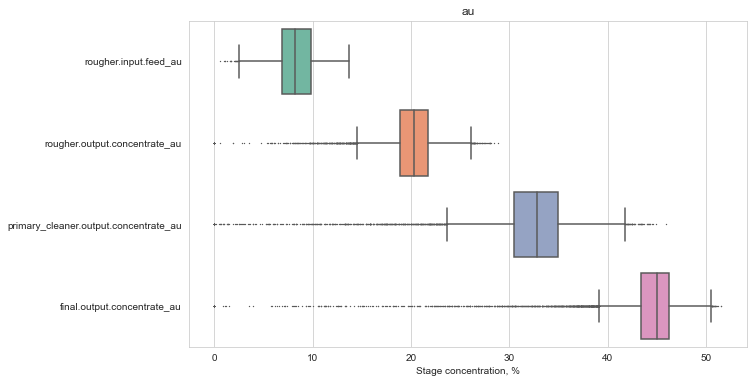

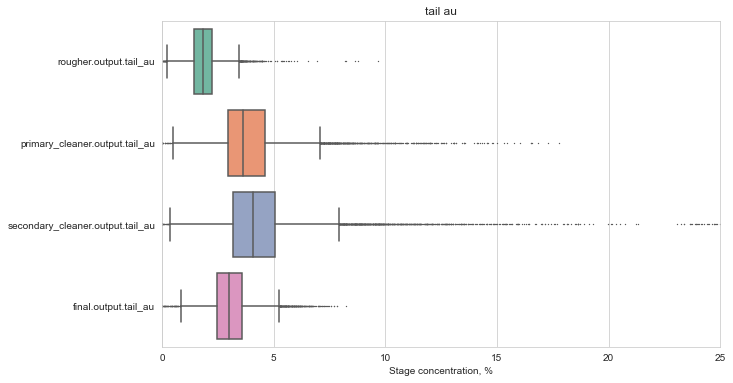

In [30]:
concentration('au')

Заметно, что доля золота в концентрате на этапе подачи смеси золотосодержащей руды составляет в среднем около 8% и на этапе получения финального концентрата составляет в среднем около 44%. При этом видно, что его доля возрастает от этапа к этапу достаточно равномерно - увеличиваясь примерно на 12 п.п.

Стоит обратить внимание, что концентрации имеют очень много выбросов "вниз", то есть много значений выходят за нижний придел 1.5 межквартильного интервала.

Что касается доли золота в отвальных хвостах  - то она растет до этапа вторичной очистки. Но не превышает 5%. Распределения характеризуются многочисленными выбросами вверх - значит, имеют место быть ситуации выпадения в хвосты чрезмерного количества золота.

Далее рассмотрим серебро.

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_ag,19091.0,8.819583,1.933562,0.568441,7.255087,8.630838,10.240178,14.596026
rougher.output.concentrate_ag,19091.0,11.992513,2.718075,0.000000,10.638960,12.104070,13.731614,24.480271
primary_cleaner.output.concentrate_ag,19091.0,8.464133,2.020941,0.000000,7.278345,8.523337,9.819566,15.005789
final.output.concentrate_ag,19091.0,5.151226,1.356228,0.000000,4.240778,5.046153,5.876867,16.001945


,count,mean,std,min,25%,50%,75%,max
rougher.output.tail_ag,19091.0,5.600547,1.106904,0.594562,4.903695,5.780259,6.396104,12.719177
primary_cleaner.output.tail_ag,19091.0,16.147495,3.548118,0.000000,14.003752,15.831751,18.013975,29.459575
secondary_cleaner.output.tail_ag,19091.0,14.586642,4.262684,0.000000,12.638201,15.672927,17.352381,23.264738
final.output.tail_ag,19091.0,9.687322,2.330783,0.000000,8.062037,9.726873,11.129639,19.552149


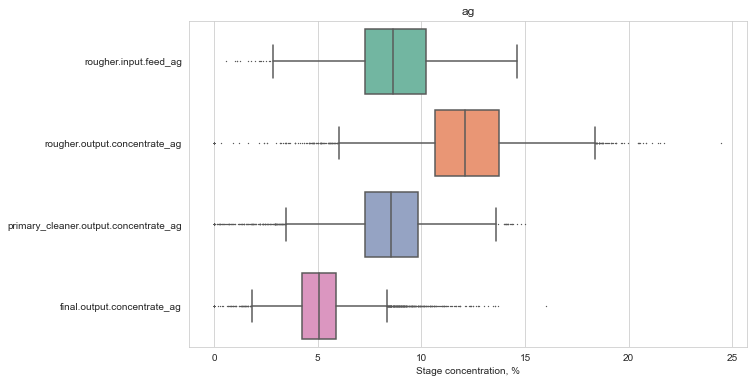

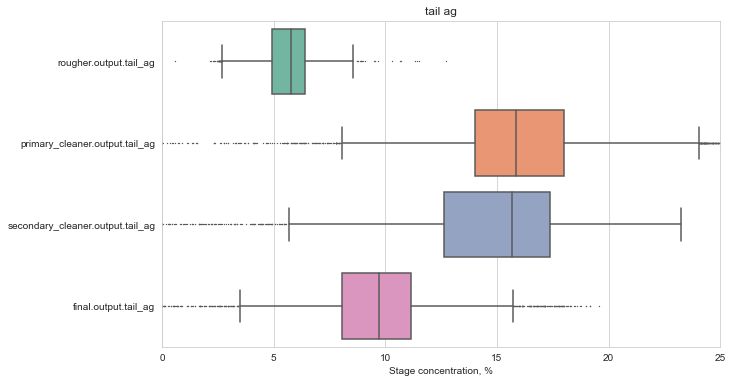

In [31]:
concentration('ag')

Из таблицы и графиков видно, что на уровне подаваемого сырья концетрации золота и серебра примерно одинаковы - 8.3% против 8.8%. Но по-видимому из-за того, что золото ценнее серебра, мы сосредотачиваемся на получении золота - и доля серебра в черновом концентрате увеличивается, по сравнению с сырьем, но потом на стадии первичной очистки значительное количество серебра уходит в "хвост" - его доля в "хвостах" превышает 15% - более чем на 10 п.п. больше, чем концентрация золота в "хвостах". В итоге в финальном концентрате доля серебра составляет в среднем 5%.

Затем взглянем на свинец.

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_pb,19091.0,3.616897,1.037801,0.157686,2.910798,3.551641,4.255576,7.142594
rougher.output.concentrate_pb,19091.0,7.626097,1.785763,0.000000,6.732898,7.752257,8.577296,13.617072
primary_cleaner.output.concentrate_pb,19091.0,9.873949,2.517714,0.000000,8.761059,10.176142,11.437560,17.081278
final.output.concentrate_pb,19091.0,10.000613,1.650199,0.000000,9.160885,10.115748,11.045405,17.031899


,count,mean,std,min,25%,50%,75%,max
rougher.output.tail_pb,19091.0,0.648167,0.248391,0.007566,0.479914,0.619189,0.779029,3.778064
primary_cleaner.output.tail_pb,19091.0,3.440880,1.400259,0.000000,2.501106,3.274937,4.198306,9.634565
secondary_cleaner.output.tail_pb,19091.0,5.787849,2.790375,0.000000,3.850231,5.345820,7.817446,17.042505
final.output.tail_pb,19091.0,2.719792,0.943083,0.000000,2.063277,2.761529,3.339168,5.804178


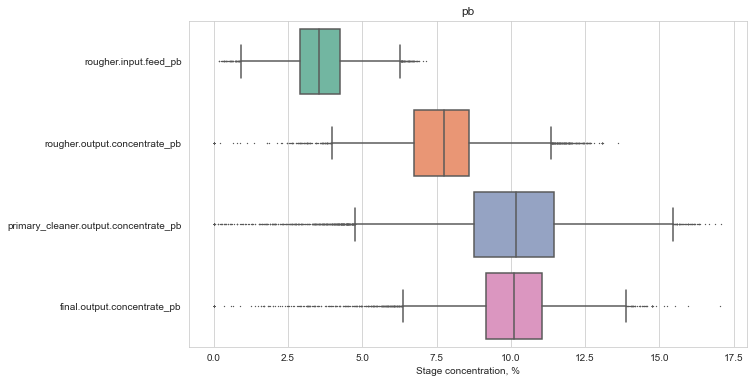

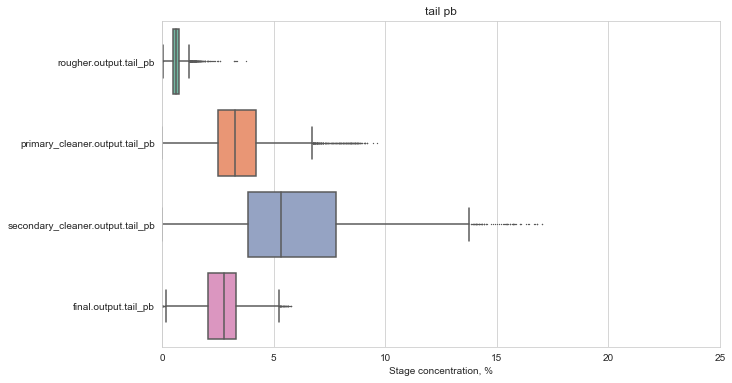

In [32]:
concentration('pb')

Исходя из графиков и таблиц заметно, что свинец, по всей видимости, является трудноудалимой примесью, с которой борются уже на стадиях после получения финального концентрата. Докахательство этому служит его возрастающая доля по этапам: в начальном сырье его всего лишь 3.5%, но в финальном концентрате - целых 10%.

Отметим, что, к примеру, после флотации его доля в хвостах около 0.5%.

Итак, мы выяснили, что доля золота во время этапов возрасате до 44%, по сравнению с сырьем, где оно составляет 8%. Доля серебра в финальном концентрате мала, вероятно, это обусловлено свойствами руды. Также мы выяснили, свинец является трудноудалимой примесью.

## 2.2 Сравнение распределений размеров гранул сырья

Далее сравним, различается ли распределение гранул сырья на обучающей и тестовой выборках.

Для этого построим гистограммы.

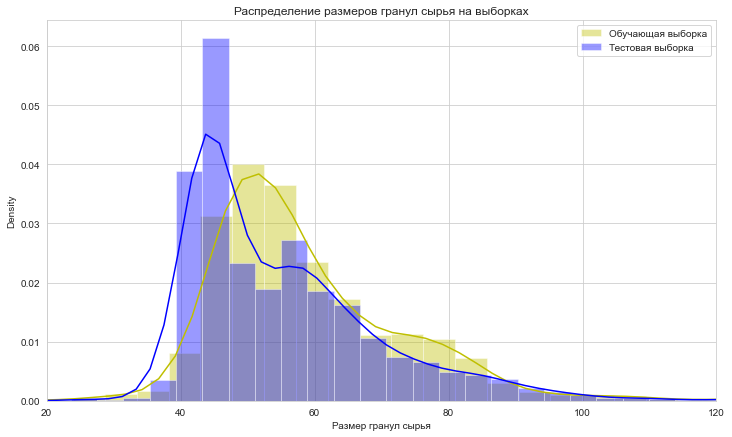

In [33]:
fig, axes = plt.subplots(figsize=(12,7))

chart = sns.distplot(train_sample['rougher.input.feed_size'],ax=axes, color='y',
                     bins=100, label='Обучающая выборка').set_xlim([20,120])

chart_2 = sns.distplot(test_sample['rougher.input.feed_size'],ax=axes, color='b',
                       bins=100, label='Тестовая выборка').set_xlim([20,120])

plt.title('Распределение размеров гранул сырья на выборках')
plt.xlabel('Размер гранул сырья')
axes.legend();

In [34]:
display(train_sample[['rougher.input.feed_size']].describe().T)
display(test_sample[['rougher.input.feed_size']].describe().T)

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_size,13804.0,60.300527,23.195805,9.659576,48.964352,55.206203,66.020449,484.967466


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_size,5287.0,55.931446,19.043125,0.046369,43.905907,50.827499,62.419505,392.49404


Как мы видим из графика и данных, распределение размеров все-таки незначительно отличается между выборками. Видно, что на тестовой выборке больше значений размера в диапазоне 40-50, чем на тестовой. На тестовой, в свою очередь - больше значений в диапзоне 50-60. То есть у распределений немного не совпадают пики. Поэтому медиана обучающей выборки на 5 больше, чем тестовой. 

В целом моно сказать, что наблюдаемые различия - незначительные, и, возможно, мы вправе рассчитывать на корректную оценку модели.

## 2.3 Исследование суммарной концентрации всех веществ на разных этапах

Далее перед нами стоит задача исследовать суммарную концентрацию веществ на этапе подачи сырья, чернового концентрата и финального концентрата.

Для анализа мы будем суммировать 4 столбца, оканчивающиеся на соответствующих этапах на '_au', '_ag', '_pb', '_sol'.

In [35]:
def overall_feature(stage, df):
    
    """Функция принимает на вход строковое название интересующего нас этапа и нужную выборку.
    Отбираются признаки для суммирования, суммируются и записываются новым столбцом в нужную выборку.
    Затем по этому столбцу строится диаграмма и рассчитывается количество значений равных 0 и > 100"""
    
    dict_names = {'rougher.input.feed' : 'Этап подачи сырья', 
                  'rougher.output.concentrate': 'Черновой концентрат',
                'final.output.concentrate' : 'Финальный концентрат'}
    
    features = (list(df.filter(regex=(stage+'_..$')).columns) + 
                        list(df.filter(regex=(stage+'_...$')).columns))
    
    elements = df[features]
    df[stage+'.overall_concentration'] = elements.sum(axis=1)
    
    df[stage+'.overall_concentration'].plot(kind='hist', bins=50, range=[0,100], figsize = [9,5])
    
    plt.title(dict_names[stage])
    plt.xlabel('Суммарная концентрация веществ, %')
    plt.ylabel('Частота')
    
    print('Количество наблюдений с концентрацией равной 0%: ',
          len(df[df[stage+'.overall_concentration'] == 0]))
    
    print('Количество наблюдений с концентрацией больше 100%: ',
          len(df[df[stage+'.overall_concentration'] >= 100]))
    
    display(df[[stage+'.overall_concentration']].describe().T)

Итак, начнем с обучающей выборки и этап подачи сырья.

Количество наблюдений с концентрацией равной 0%:  0
Количество наблюдений с концентрацией больше 100%:  0


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed.overall_concentration,13804.0,56.489463,6.794092,8.217984,52.849441,56.773913,60.896934,74.458253


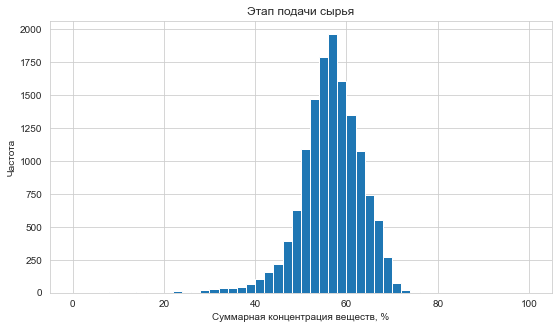

In [36]:
overall_feature('rougher.input.feed', train_sample)

Здесь ситуация выглядит нормальной - большинство значений расположились в диапазоне от 50 до 70%.
Нулевых и зашкаливающих концентраций нет. Значит, предположим, что тут аномалий нет.

Далее рассмотрим характеристики чернового концентрата обучающей выборки.

Количество наблюдений с концентрацией равной 0%:  295
Количество наблюдений с концентрацией больше 100%:  0


,count,mean,std,min,25%,50%,75%,max
rougher.output.concentrate.overall_concentration,13804.0,67.362937,12.665158,0.0,65.155193,69.306516,73.517493,88.140119


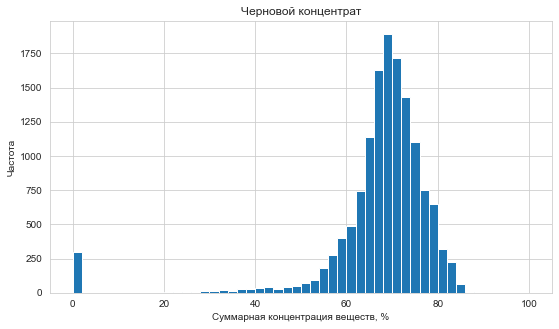

In [37]:
overall_feature('rougher.output.concentrate', train_sample)

Здесь большинство наблюдений кучно расположились в диапзоне от 55% до 80%. Но присутствуют нулевые значения.

На наш взгляд, такие наблюдения можно признать аномальными - поскольку на предыдущем этапе мы явно видели, что вся поступившая руда имела коцентрацию четырех основных веществ.

Можно предположить, что все ушло в "хвосты", однако вряд ли технологический процесс допустил бы такую ситуацию, к тому же здесь значения строго равны нулю - то есть там вообще нет металлов. А самое главное отсутствует параметр '_sol', который, видимо, является заполнителем прочих веществ. То есть, Это аномальная ситуация и от этих наблюдений нам лучше избавиться.

Рассмотрим финальный концентрат.

Количество наблюдений с концентрацией равной 0%:  54
Количество наблюдений с концентрацией больше 100%:  0


,count,mean,std,min,25%,50%,75%,max
final.output.concentrate.overall_concentration,13804.0,68.514911,6.932017,0.0,67.651957,69.187544,71.024092,80.210644


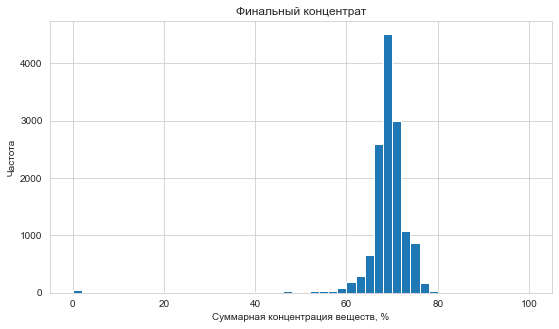

In [38]:
overall_feature('final.output.concentrate', train_sample)

Здесь видно, что подавляющее большинство наблюдений лежит в диапзоне 60-80%. Также встречается несколько нулей - по причинам описанным выше, эти строки также можно считать аномальными, поэтому удалим их.

Проверим, добавились ли колонки в обучающую выборку.

In [39]:
train_sample.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.overall_concentration,rougher.output.concentrate.overall_concentration,final.output.concentrate.overall_concentration
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180


Да, добавились, теперь удалим аномалии.

In [40]:
train_sample = train_sample[(train_sample['rougher.output.concentrate.overall_concentration'] > 0) & 
                        (train_sample['final.output.concentrate.overall_concentration'] > 0)]

Далее рассмотрим на предмет концентрации тестовую выборку.

У нее нет признаков с выходными параметрами, поэтому будем рассматривать только параметры сырья.

Количество наблюдений с концентрацией равной 0%:  0
Количество наблюдений с концентрацией больше 100%:  0


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed.overall_concentration,5287.0,60.211077,6.896168,4.501868,56.461361,59.999962,65.105638,76.978947


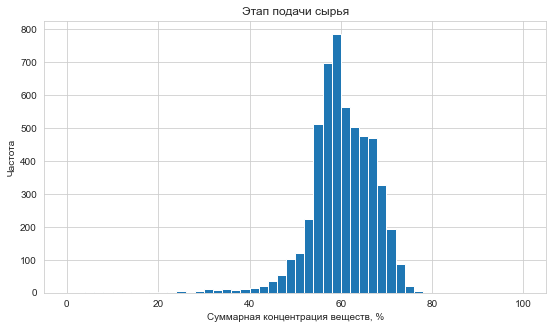

In [41]:
overall_feature('rougher.input.feed', test_sample)

Мы видим среднюю концентрацию на уровне обучающей выборки, значений, похожих на аномальные, на наш взгляд, нет. Оставим все строки.

Также удалим столбцы с расчетной концентрацией.

In [42]:
train_sample = train_sample.drop(columns = list(train_sample.filter(regex=('overall_concentration'))))
test_sample = test_sample.drop(columns = list(test_sample.filter(regex=('overall_concentration'))))

Итак, с аномалиями покончено. На следующем этапе будем обучать модели.

# 3. Модель

## 3.1 Функция для вычисления итоговой sMAPE

Перед тем, как написать функция для оценки качества, подготовим данные для обучения, чтобы понимать, с какими массивами нам нужно будет работать.

Итак, по условиям задачи нам необходимо спрогнозировать сразу две величины - эффективность обогащения чернового концентрата ('rougher.output.recovery') и эффективность обогащения финального концентрата('final.output.recovery').

Следовательно, нам нужна регрессионная модель, в которой будет сразу 2 зависимых переменных.

Создадим массивы для обучающей выборки. Для обучения будем использовать только те признаки, которые есть в тестовой выборке.

In [43]:
target_train = train_sample[['rougher.output.recovery', 'final.output.recovery']]
features_train = train_sample.loc[:, list(test_sample.columns)]
                               
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13456 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13456 non-null  float64
 1   primary_cleaner.input.depressant            13456 non-null  float64
 2   primary_cleaner.input.feed_size             13456 non-null  float64
 3   primary_cleaner.input.xanthate              13456 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13456 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13456 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13456 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13456 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13456 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13456 non-nu

Далее нам необходимо подготовить значения целевых признаков тестовой выборки, отберем их из исходных данных full_data.

In [44]:
target_test = full_data.loc[test_sample.index, ['rougher.output.recovery', 'final.output.recovery']]
target_test

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


Для решения нашей задачи прогнозирования эффективности обогещения будем использовать метрику качества - симметричное среднее абсолютное процентное отклонение. 

Наши регрессионные модели в предсказаниях будут возвращать массив, состоящий из подмассивов с двумя элементами, соответственно, первый элемент такого подмассива - это предсказание 'rougher', второй - 'final'.

Учтем это в метрике качества.

In [45]:
def sMAPE(target, predictions):
    
    """Функция суммирует отношение модуля разности таргета и предсказания к среднему значению
    модуля таргета и модуля предсказания. Затем взвешивает полученные оценки с весами 0.25 и 0.75
    для чернового и финального концентрата соответственно"""
    
    rougher_sMAPE = sum([abs(target.iloc[:,0][i] - predictions[:,0][i]) / 
                         ((abs(target.iloc[:,0][i]) + abs(predictions[:,0][i])) / 2) 
                 for i in range(len(target))]) / len(target) * 100
    
    
    final_sMAPE = sum([abs(target.iloc[:,1][i] - predictions[:,1][i]) / 
                         ((abs(target.iloc[:,1][i]) + abs(predictions[:,1][i])) / 2) 
                 for i in range(len(target))]) / len(target) * 100
    
    overall_sMAPE = 0.25 * rougher_sMAPE + 0.75 * final_sMAPE
    
    return overall_sMAPE

Итак, функция написана. Перейдем к этапу обучения моделей.

## 3.2 Обучение моделей

Постараемся поискать лучшие модели в алгоритмах линейной регрессии, решающего дерева и случайного леса для регрессии.

Для подбора гиперпараметров будем использовать инструмент GridSearchCV - он позволит перебирать параметры и содержит в себе кросс-валидацию.

Также будем использовать функцию cross_val_score для модели с выбранными параметрами.

Для оценки качества перебираемых параметров мы будем использовать нашу функцию sMAPE.

Найдя лучшие параметры, мы применим модель на данных тестовой выборки.

Итак, для начала создадим инструмент оценки качества для его использования в GridSearchCV.

Сделаем это инструментом make_scorer, наша задача - минимизировать значение этой метрики, передадим соответствующий параметр.

In [46]:
my_scorer = make_scorer(sMAPE, greater_is_better=False)

### 3.2.1 Линейная регрессия

Начнем с линейной регрессии.

In [47]:
lin_model = LinearRegression()

Проверим качество кросс-валидацией.

In [48]:
lin_scores = cross_val_score(lin_model, features_train, target_train, scoring=my_scorer, cv=5)
lin_scores

array([-10.59578473,  -8.16609139,  -8.37453033,  -8.00674213,
       -12.13983098])

Получили массив sMAPE на 5 валидационных выборках, посчитаем среднее отклонение.

Знак "минус" перед оценками нас не должен пугать - это выражение того, что нам необходимо минимизировать метрику.

In [49]:
-sum(lin_scores) / len(lin_scores)

9.456595912199564

Значит, в среднем модель линейной регрессии ошибается примерно на 9.5% по взвешенным таргетам.

### 3.2.2 Дерево решений в регрессии

Далее рассмотрим дерево решений в регрессии.

In [50]:
tree_model = DecisionTreeRegressor(random_state = 2)

Здесь используем GridSearchCV, чтобы и перебрать немного параметров и получить оценку по кросс-валидации.

In [51]:
tree_params = {
                'max_features' : range(8, 10, 1),
                'max_depth': range(3,6)}

best_tree = GridSearchCV(tree_model, tree_params, scoring=my_scorer, cv=5,n_jobs=-1, verbose=True)

In [52]:
best_tree.fit(features_train, target_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': range(3, 6),
                         'max_features': range(8, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=True)

In [53]:
best_tree.best_params_

{'max_depth': 3, 'max_features': 9}

Получается, лучшее дерево обладает глубиной - 3 и число признаков, по которым ищется разбиение равно 9.

In [54]:
best_tree.best_score_

-8.220122734541391

Оценка лучшей модели чуть выше 8%, что лучше, чем линейная регрессия.

### 3.2.3 Случайный лес в регрессии

Далее рассмотрим случайный лес в регрессии. 

In [55]:
rf_model = RandomForestRegressor(random_state=2, n_estimators=20)

In [56]:
forest_params = {
                'max_features' : range(5, 10, 1),
                'max_depth': range(3,5)}

forest_grid = GridSearchCV(rf_model, forest_params, scoring=my_scorer, cv=5, n_jobs=-1, verbose=True)

In [57]:
forest_grid.fit(features_train, target_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.3s finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=20, random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 5),
                         'max_features': range(5, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=True)

In [58]:
forest_grid.best_params_

{'max_depth': 4, 'max_features': 7}

In [59]:
forest_grid.best_score_

-8.077988869351021

У случайного леса глубина - 4, а количество признаков, по которым ищется разбиение - 7. Оценка также незначительно лучше, чем у решащего дерева. Получается, что лучшая модель - это случайный лес.

Далее проверим модель на адекватность - то есть узнаем, действительно ли модель справляется с предсказанием значений лучше, чем какая-либо константа, например - медиана целевых признаков.

Для этого создадим массив с медианами.

In [60]:
target_median_rougher = pd.Series(target_train.iloc[:, 0].median(), index=target_test.index)
target_median_rougher

date
2016-09-01 00:59:59    85.646462
2016-09-01 01:59:59    85.646462
2016-09-01 02:59:59    85.646462
2016-09-01 03:59:59    85.646462
2016-09-01 04:59:59    85.646462
                         ...    
2017-12-31 19:59:59    85.646462
2017-12-31 20:59:59    85.646462
2017-12-31 21:59:59    85.646462
2017-12-31 22:59:59    85.646462
2017-12-31 23:59:59    85.646462
Length: 5287, dtype: float64

In [61]:
target_median_final = pd.Series(target_train.iloc[:, 1].median(), index=target_test.index)
target_median_final

date
2016-09-01 00:59:59    67.626325
2016-09-01 01:59:59    67.626325
2016-09-01 02:59:59    67.626325
2016-09-01 03:59:59    67.626325
2016-09-01 04:59:59    67.626325
                         ...    
2017-12-31 19:59:59    67.626325
2017-12-31 20:59:59    67.626325
2017-12-31 21:59:59    67.626325
2017-12-31 22:59:59    67.626325
2017-12-31 23:59:59    67.626325
Length: 5287, dtype: float64

In [62]:
target_median = np.column_stack((target_median_rougher, target_median_final))
target_median

array([[85.64646174, 67.62632514],
       [85.64646174, 67.62632514],
       [85.64646174, 67.62632514],
       ...,
       [85.64646174, 67.62632514],
       [85.64646174, 67.62632514],
       [85.64646174, 67.62632514]])

Передадим метрике качества массив с медианами.

In [63]:
sMAPE(target_test, target_median)

9.286292164357455

Получается, что предсказания целевых признаков по медианным значениям приводят к средней ошибке около 9% по взвешенным эффективностям обогащения.

Поскольку модель случайного леса показала значение метрики качества почти на 1 п.п. ниже, то можно сказать, что она прошла проверку на адекватность.

Проверим прошедшую на адекватность лучшую модель на тестовой выборке.

In [64]:
best_forest_model = RandomForestRegressor(random_state=2, n_estimators=20, max_depth=4, max_features=7)

In [65]:
best_forest_model.fit(features_train, target_train)

RandomForestRegressor(max_depth=4, max_features=7, n_estimators=20,
                      random_state=2)

In [66]:
predictions_forest = best_forest_model.predict(test_sample)

In [67]:
print(f'sMAPE на тестовой выборке: {sMAPE(target_test, predictions_forest)}')

sMAPE на тестовой выборке: 8.693711364248657


## Вывод

Получается, что лучшей моделью стал случайный лес в регрессии.

Оценка метрики качества на тестовой выборке - около 8.7%. Значит, если мы будем пользоваться ей в будущем, то в среднем будем ошибаться почти на 9% при оценке эффективности обогащения концентратов.

Отметим, что модель прошла проверку на адекватность - она справляется с предсказанием целевых признаков лучше, чем константная модель с медианами - 8.08% против 9.06% на обучающей выборке. Да, различие невелико, однако оно есть, и это значит, что мы на верном пути.